In [2]:
from __future__ import division, print_function, unicode_literals


# common imports


import tensorflow as tf

import numpy as np

import os


def reset_graph(seed= 42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
    
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 12

plt.rcParams['ytick.labelsize'] = 12


#where to save the figure

PROJECT_ROOT_DIR = "."

CHAPTER_ID = "cnn"


def save_fig(fig_id, tight_layout = True):
    
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    
    
    print("Saving figur", fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = "png", dpi = 300)
    
    
    
    
    
    
    
    

In [3]:
def plot_image(image):
    plt.imshow(image, cmap = "gray", interpolation= "nearest")
    plt.axis("off")

    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8), interpolation = "nearest")
    plt.axis("off")

# Let's see the convolutional layer


In [4]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")

flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]

height, width, channels = image.shape
2

image_grayscale = image.mean(axis = 2).astype(np.float32)

images = image_grayscale.reshape(1,height, width, 1)


### check

In [5]:
print(np.shape(image_grayscale))

print(np.shape(images))



(70, 120)
(1, 70, 120, 1)


In [6]:
print(image_grayscale)


[[  50.33333206   98.33333588   98.66666412 ...,   90.           57.
    99.33333588]
 [  56.33333206  108.33333588   96.         ...,   90.66666412
    66.33333588   68.66666412]
 [  47.66666794  116.66666412  105.66666412 ...,   94.           65.33333588
    64.33333588]
 ..., 
 [  20.33333397   18.66666603   17.66666603 ...,   19.           22.33333397
    21.33333397]
 [  14.66666698   19.33333397   20.         ...,   15.           18.66666603
    18.33333397]
 [  16.           15.66666698   24.         ...,   20.33333397   14.
    17.66666603]]


In [7]:
print(images)

[[[[  50.33333206]
   [  98.33333588]
   [  98.66666412]
   ..., 
   [  90.        ]
   [  57.        ]
   [  99.33333588]]

  [[  56.33333206]
   [ 108.33333588]
   [  96.        ]
   ..., 
   [  90.66666412]
   [  66.33333588]
   [  68.66666412]]

  [[  47.66666794]
   [ 116.66666412]
   [ 105.66666412]
   ..., 
   [  94.        ]
   [  65.33333588]
   [  64.33333588]]

  ..., 
  [[  20.33333397]
   [  18.66666603]
   [  17.66666603]
   ..., 
   [  19.        ]
   [  22.33333397]
   [  21.33333397]]

  [[  14.66666698]
   [  19.33333397]
   [  20.        ]
   ..., 
   [  15.        ]
   [  18.66666603]
   [  18.33333397]]

  [[  16.        ]
   [  15.66666698]
   [  24.        ]
   ..., 
   [  20.33333397]
   [  14.        ]
   [  17.66666603]]]]


[[[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  1.]]

  [[ 0.  1.]]

  [[ 0.  1.]]

  [[ 1.  1.]]

  [[ 0.  1.]]

  [[ 0.  1.]]

  [[ 0.  1.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]]


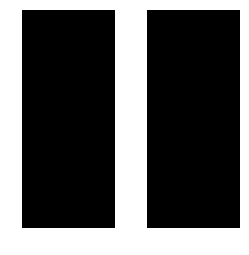

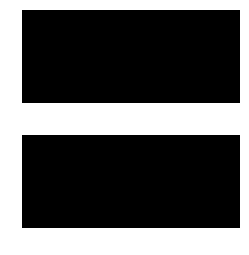

In [8]:
fmap = np.zeros(shape = (7,7,1,2), dtype = np.float32)

fmap[:,3,0,0] = 1


fmap[3,:,0,1] = 1

fmap[:,:,0,0]

print(fmap)


plot_image(fmap[:,:,0,0])

plt.show()

plot_image(fmap[:,:,0,1])
plt.show()


In [9]:
reset_graph()

X = tf.placeholder(tf.float32, shape = (None, height, width, 1))

feature_maps = tf.constant(fmap)

convolution = tf.nn.conv2d(X, feature_maps, strides = [1,1,1,1], padding = "SAME", use_cudnn_on_gpu =False)

In [10]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict = {X: images})

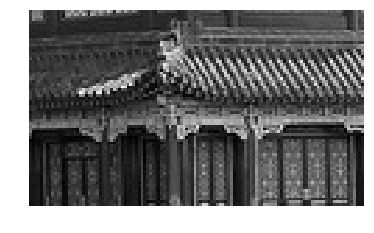

In [11]:
plot_image(images[0,:,:,0])


plt.show()

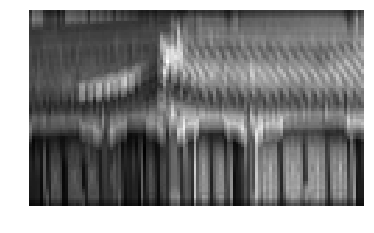

In [12]:
plot_image(output[0,:,:,0])

plt.show()

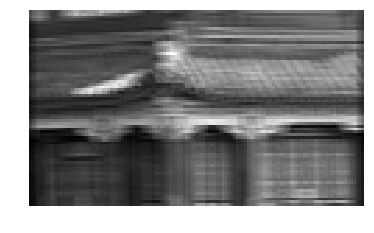

In [13]:
plot_image(output[0,:,:,1])

plt.show()

[[[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 1.  0.]]

  [[ 1.  0.]]

  [[ 1.  0.]]

  [[ 1.  0.]]

  [[ 1.  0.]]

  [[ 1.  0.]]

  [[ 1.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]


 [[[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 1.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]

  [[ 0.  0.]]]]


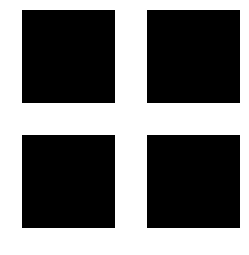

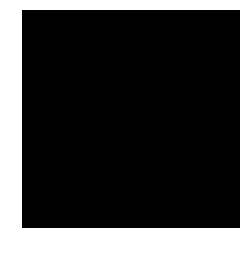

In [14]:
#experiement 


wonseok_fmap = np.zeros(shape = (7,7,1,2), dtype = np.float32)

wonseok_fmap[:,3,0,0] = 1
wonseok_fmap[3,:,0,0] = 1
print(wonseok_fmap)



plot_image(wonseok_fmap[:,:,0,0])
plt.show()
plot_image(wonseok_fmap[:,:,0,1])
plt.show()





In [15]:
reset_graph()

wonseok_X = tf.placeholder(tf.float32, shape = (None, height, width, 1 ))

wonseok_feature_maps = tf.constant(wonseok_fmap)

wonseok_convolution = tf.nn.conv2d(wonseok_X, wonseok_feature_maps,strides = [1,1,1,1], padding = "SAME", use_cudnn_on_gpu = False)



In [16]:


with tf.Session() as sess:
    wonseok_output = wonseok_convolution.eval(feed_dict = {X : images})

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(?, 70, 120, 1), dtype=float32) is not an element of this graph.

# Simple example

In [17]:
from sklearn.datasets import load_sample_images

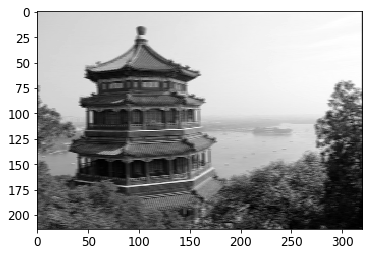

In [18]:
china = load_sample_image("china.jpg")

flower = load_sample_image("flower.jpg")

dataset = np.array([china, flower], dtype = np.float32)

batch_size, height, width, channels = dataset.shape 

#필터 2개 만들기

filters = np.zeros(shape = (7,7,channels,2),dtype = np.float32)

filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

# create a graph with input x plus convolutional applying the two filters

X = tf.placeholder(tf.float32, shape = (None, height, width, channels))

convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding = "SAME")


with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X:dataset})
    
plt.imshow(output[0,:,:,1], cmap = "gray") #plot 1st image's 2nd feature map

plt.show()

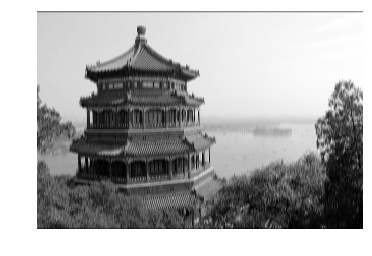

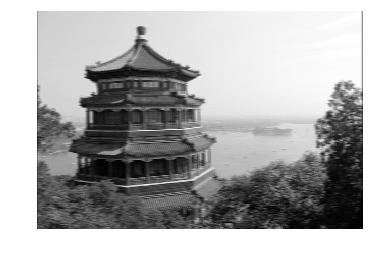

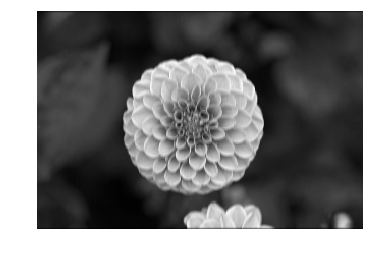

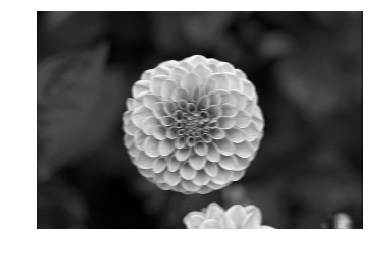

In [19]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

# 그냥 tf.layers.conv2d() 써보기 

In [20]:
reset_graph()

X = tf.placeholder(shape = (None, height, width, channels), dtype = tf.float32)
conv = tf.layers.conv2d(X, filters = 2, kernel_size = 7, strides =[2,2], padding ="SAME")



In [21]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict = {X:dataset})

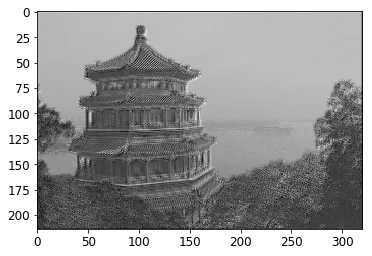

In [22]:
plt.imshow(output[0,:,:,1], cmap = "gray") #plot 1st image's 2nd feature map

plt.show()

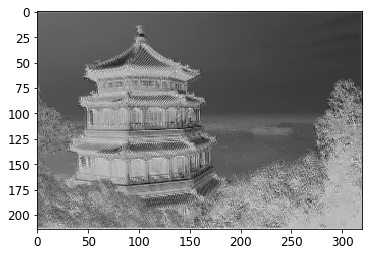

In [23]:
plt.imshow(output[0,:,:,0], cmap = "gray")
plt.show()

### VALID vs SAME padding

In [26]:
reset_graph()

filter_primes =np.array([2.,3.,5.,7.,11.,13.], dtype = np.float32)


x = tf.constant(np.arange(1,13+1, dtype =np.float32).reshape([1,1,13,1]))

filters = tf.constant(filter_primes.reshape(1,6,1,1,))

valid_conv = tf.nn.conv2d(x, filters, strides = [ 1,1,5,1], padding = 'VALID')

same_conv = tf.nn.conv2d(x, filters, strides = [ 1,1,5,1], padding="SAME")

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[ 184.]
   [ 389.]]]]
SAME:
 [[[[ 143.]
   [ 348.]
   [ 204.]]]]


# Pooling layer


In [27]:
batch_size, height, width, channels = dataset.shape


In [35]:
filters =np.zeros(shape = (7,7, channels, 2), dtype = np.float32)

filters[:,3,:,0] = 1 #vertical line

filters[3, :, :, 1] = 1 #horizontal line

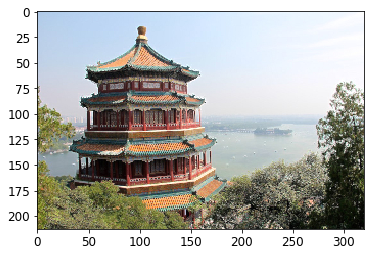

In [36]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize =[1,2,2,1],strides = [1,2,2,1], padding ="VALID")


with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X:dataset})
    

plt.imshow(output[0].astype(np.uint8))

plt.show()

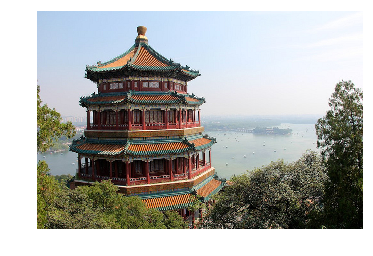

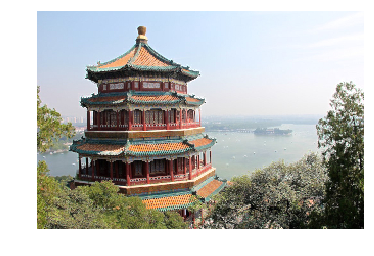

In [43]:
#compare with dataset and after pooling

plot_color_image(dataset[0])


plt.show()

plot_color_image(output[0])

plt.show()

In [44]:
print(np.shape(dataset[0]))

print(np.shape(output[0]))


# 크기가 줄어들었다 !

(427, 640, 3)
(213, 320, 3)


In [60]:
reset_graph()

# MNIST

In [61]:
height = 28

width =28

channels = 1

n_inputs = height * width

conv1_fmaps = 32

conv1_ksize = 3

conv1_stride = 1

conv1_pad = "SAME"

conv2_fmaps = 64

conv2_ksize = 3

conv2_stride = 2

conv2_pad ="SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64

n_outputs = 10

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape = [None, n_inputs], name ="X")
    X_reshaped = tf.reshape(X, shape= [-1,height, width, channels])
    y = tf.placeholder(tf.int32, shape =[None], name = "y")
    
conv1 = tf.layers.conv2d(X_reshaped, filters = conv1_fmaps, kernel_size = conv1_ksize, strides = conv1_stride,  padding = conv1_pad,
                         activation = tf.nn.relu, name = "conv1")

conv2 = tf.layers.conv2d(conv1,filters = conv2_fmaps, kernel_size = conv2_ksize, strides = conv2_stride, padding = conv2_pad, 
                        activation = tf.nn.relu, name = "conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps *7*7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, name = "fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name = "output")
    Y_proba = tf.nn.softmax(logits, name ="Y_proba")
    
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    

In [63]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [64]:
n_epochs = 10

batch_size = 100

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict ={X: X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y: mnist.test.labels})
        
        print(epoch, "Train accuracy", acc_train, "Test accuracy:", acc_test)
        
        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy 0.99 Test accuracy: 0.9802
1 Train accuracy 0.97 Test accuracy: 0.9818
2 Train accuracy 1.0 Test accuracy: 0.9823
3 Train accuracy 0.99 Test accuracy: 0.9865
4 Train accuracy 1.0 Test accuracy: 0.9862
5 Train accuracy 0.98 Test accuracy: 0.9882
6 Train accuracy 1.0 Test accuracy: 0.9871
7 Train accuracy 1.0 Test accuracy: 0.986
8 Train accuracy 1.0 Test accuracy: 0.9837
9 Train accuracy 1.0 Test accuracy: 0.9863
